## Spin groups and statistics

In [4]:
from ATARI.syndat.sample_widths import sample_RRR_widths
from matplotlib.pyplot import *
import numpy as np
#%%
import numpy as np
import pandas as pd
import os
import h5py
import scipy.stats as sts

from ATARI.syndat.particle_pair import Particle_Pair
from ATARI.syndat.experiment import Experiment
from ATARI.syndat.MMDA import generate
from ATARI.theory.resonance_statistics import make_res_par_avg
from ATARI.syndat.sample_resparms import sample_resonance_ladder

In [5]:
%matplotlib widget

In [24]:

#%%
ac = 0.81271  # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity
l_max = 1       # highest order l-wave to consider

E_min_max = [75, 125]
energy_grid = E_min_max

input_options = {'Add Noise': True,
                'Calculate Covariance': True,
                'Compression Points':[],
                'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.1024,   'unc'   :   0},
                         'n':  {'val':0.067166,     'unc'   :0}}

exp = Experiment(energy_grid, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)


res_par_avg = make_res_par_avg(D_avg = 8.79, 
                               Gn_avg= 46.4, 
                               n_dof = 1, 
                               Gg_avg = 64.0, 
                               g_dof = 1000, 
                               print = False)

spin_groups = [ (3.0,1,0) ]
average_parameters = {'3.0':res_par_avg}

# resonance_ladder = sample_resonance_ladder(exp.energy_domain, spin_groups, average_parameters, 
#                                                             use_fudge=False)

Ta_pair = Particle_Pair( ac, M, m, I, i, l_max,
                                input_options={},
                                spin_groups=spin_groups,
                                average_parameters=average_parameters )   


Gg = []
Gn = []

for i in range(10000):
    resonance_ladder = Ta_pair.sample_resonance_ladder(exp.energy_domain, spin_groups, average_parameters)
    Gn.extend(list(resonance_ladder["Gn"].values))
    Gg.extend(list(resonance_ladder["Gg"].values))
                                    

In [81]:
dof, loc, scale = sts.chi2.fit(Gg, floc=0)  ## need to fit with different dof scales until loc is closest to 0

print(dof, scale*dof)

1003.9331663830148 64.00251610257058


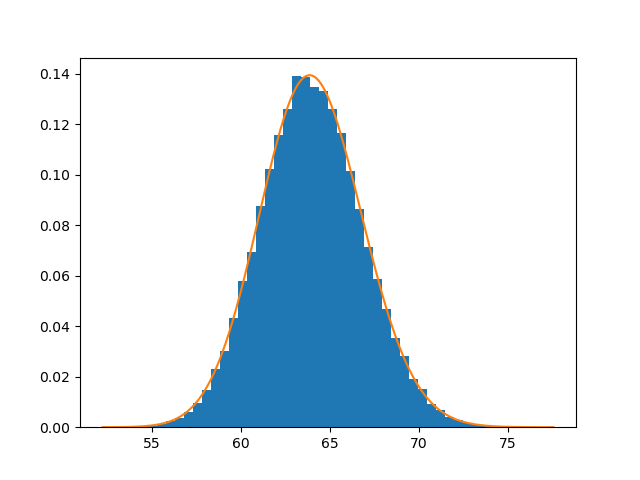

In [75]:
dof = 1000
mean = np.mean(Gg)

figure()
x = np.linspace(min(Gg), max(Gg), 1000)
# x = np.linspace(0, 1000, 1000)
bins = hist(Gg, bins=50, density=True)
plot(x, sts.chi2.pdf(x, dof, scale=mean/dof))

#### If I sample on Gn, does the 2P(E) factor shake out?

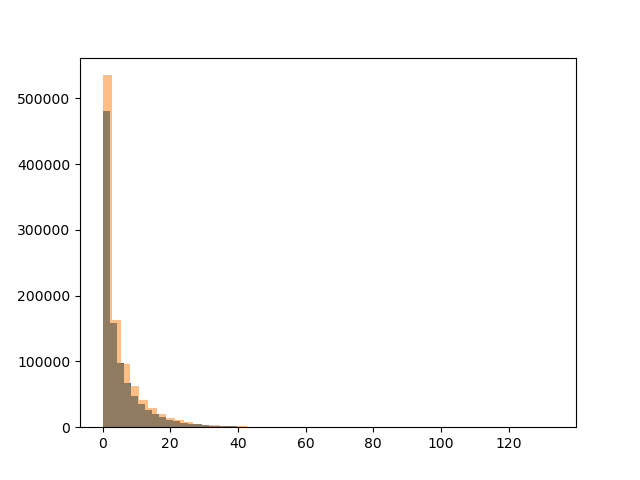

In [3]:
PE = 12

gn_avg = 5
gn = sample_RRR_widths(np.ones(1000000), gn_avg, 1)

Gn_avg = gn_avg*PE
Gn = sample_RRR_widths(np.ones(1000000), Gn_avg, 1)
figure()

bins = hist(gn, bins=50)
bins = hist(Gn/PE, bins=50, alpha=0.5)

In [ ]:
# wig1 = syndat.sample_wigner_invCDF(10000)*3
# wig2 = syndat.sample_wigner_invCDF(10000)
# total = np.append(wig1,wig2)
# gb = endf_par.groupby('jspin')
# dfs_by_spin=[gb.get_group(x) for x in gb.groups]
# j3 = dfs_by_spin[0]
# j4 = dfs_by_spin[1]

# dE_j3 = np.diff(j3.E)
# dE_avg_j3 = endf_avg.dE[1]

# PT1 = syndat.sample_widths.sample_chisquare(10000,1)
# PT2 = syndat.sample_widths.sample_chisquare(10000,1)

# PT1 = PT1[PT1>0.2]
# PT2 = PT2[PT2<0.2]

# tot = np.append(PT1,PT2)

# figure()
# hist(PT1,bins=200,density=True)

# x = np.linspace(0,6,100)
# plot(x,syndat.sample_widths.chisquare_PDF(x, 1, 1))
# xlim([0,8])